<a href="https://colab.research.google.com/github/Luantrannew/uni_project/blob/main/wineQuality_clustering_classifiring_LNR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

##Tổng Hợp

In [ ]:
#red
#https://docs.google.com/spreadsheets/d/e/2PACX-1vQJDOHtZPY5geaJIvtuUdliUIupE2tMqS_g4WatOl5CKfSnk6E3v28xZWoFsyDJveDAFaOXUYjFNNab/pub?output=csv
#white
#https://docs.google.com/spreadsheets/d/e/2PACX-1vThlDhcd5Jhr6_WArUumeUXv7dALwneQnEBZp3FPfZrgZdsSDGePuF3BTK9rpVLZe_sX8ctv7pQ6bW_/pub?output=csv

In [ ]:
# Đọc dữ liệu từ hai tập tin riêng biệt
white_wine_data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vThlDhcd5Jhr6_WArUumeUXv7dALwneQnEBZp3FPfZrgZdsSDGePuF3BTK9rpVLZe_sX8ctv7pQ6bW_/pub?output=csv')
red_wine_data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQJDOHtZPY5geaJIvtuUdliUIupE2tMqS_g4WatOl5CKfSnk6E3v28xZWoFsyDJveDAFaOXUYjFNNab/pub?output=csv')


In [ ]:
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.000,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.05,30.0,97.0,9.951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,9.9,6


In [ ]:
# Thêm cột 'wine_type' để phân biệt rượu trắng và rượu đỏ
white_wine_data['wine_type'] = 'white'
red_wine_data['wine_type'] = 'red'

In [ ]:
wine_quality_data = pd.concat([white_wine_data, red_wine_data])

In [ ]:
wine_quality_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1.001,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.000,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.05,30.0,97.0,9.951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,58.00,47.0,186.0,9.956,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.60,0.08,2.0,0.09,32.0,44.0,9.949,3.45,0.58,10.5,5,red
1595,5.9,0.55,0.10,2.2,62.00,39.0,51.0,99.512,3.52,0.76,11.2,6,red
1596,6.3,0.51,0.13,2.3,76.00,29.0,40.0,99.574,3.42,0.75,11,6,red
1597,5.9,645.00,0.12,2.0,75.00,32.0,44.0,99.547,3.57,0.71,10.2,5,red


In [ ]:
# Xáo trộn toàn bộ dòng trong bộ dữ liệu
wine_quality_data_randomized = wine_quality_data.sample(frac=1)

In [ ]:
wine_quality_data_randomized['wine_type'] = wine_quality_data_randomized['wine_type'].map({'white': 0, 'red': 1})

In [ ]:
wine_quality_data_randomized.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
66,7.5,0.52,0.11,1.5,79.0,11.0,39.0,9.968,3.42,0.58,9.6,5,1
1335,5.7,0.21,0.24,2.3,47.0,60.0,189.0,995.000,3.65,0.72,10.1,6,0
775,6.4,225.00,0.48,2.2,115.0,29.0,104.0,9.918,3.24,0.58,12.1,6,0
1165,8.5,0.44,0.50,1.9,369.0,15.0,38.0,99.634,3.01,1.10,9.4,5,1
4271,6.9,0.42,0.20,15.4,43.0,57.0,201.0,99.848,3.08,0.54,9.4,5,0
2285,7.4,0.33,0.26,15.6,49.0,67.0,210.0,99.907,3.06,0.68,9.5,5,0
2129,6.8,0.28,0.39,1.4,36.0,15.0,115.0,9.918,3.27,0.72,11.7,5,0
1364,7.2,605.00,0.02,1.9,96.0,10.0,31.0,995.000,3.46,0.53,11.8,6,1
2675,7.2,0.32,0.24,5.6,33.0,23.0,120.0,99.334,2.92,0.66,10.3,7,0
4674,5.8,0.35,0.29,3.2,34.0,41.0,151.0,9.912,3.35,0.58,116.333.333.333.333,7,0


In [ ]:
wine_quality_data_randomized.to_csv('winedata1.csv', index=False)

In [ ]:
from google.colab import files

files.download('winedata1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Tiền Xử Lí

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
wine = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTclfyFciyDUifHNoqinX6ihA1A_U6TjUZpQaeXSRwBIM5fO2KTQFXHseUEaSAwxCaSLRzJWaYdNrTD/pub?output=csv')

In [ ]:
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,6.1,0.33,0.32,7.8,52.0,52.0,183.0,99.657,3.39,0.65,9.5,5,0
1,7.1,0.34,0.28,2.0,82.0,31.0,68.0,99.694,3.45,0.48,9.4,5,1


In [ ]:
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                  object
quality                   int64
wine_type                 int64
dtype: object

In [ ]:
# Loại bỏ tất cả các dấu "." thừa, chỉ giữ lại một dấu "."
wine['alcohol'] = wine['alcohol'].str.replace('.', '', regex=False)
# Chuyển đổi cột "alcohol" thành kiểu dữ liệu float
wine['alcohol'] = wine['alcohol'].astype(float)

##check null

In [ ]:
# Kiểm tra giá trị null trong bộ dữ liệu
null_values = wine.isnull().sum()
null_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

##loại bỏ dòng lặp


In [ ]:
# Kiểm tra và in ra số dòng trùng lặp
duplicate_rows = wine[wine.duplicated()]
print("Số dòng trùng lặp:", duplicate_rows.shape[0])

Số dòng trùng lặp: 1177


In [ ]:
duplicate_rows = wine[wine.duplicated(keep=False)]
duplicate_row_counts = duplicate_rows.apply(lambda row: row.duplicated().sum(), axis=1)
print("Số cột bị trùng lặp trong mỗi dòng trùng lặp:")
print(duplicate_row_counts)

Số cột bị trùng lặp trong mỗi dòng trùng lặp:
0       1
1       0
2       1
6       0
8       0
       ..
6483    1
6485    0
6489    0
6491    0
6495    1
Length: 2169, dtype: int64


In [ ]:
duplicate_rows = wine[wine.duplicated(keep=False)]
duplicate_row_counts = duplicate_rows.apply(lambda row: row.duplicated().sum(), axis=1)

# Đếm số dòng có số cột bị trùng lặp trên 3
rows_with_more_than_3_duplicates = (duplicate_row_counts > 2).sum()
print("Số dòng có số cột bị trùng lặp trên 3:", rows_with_more_than_3_duplicates)

Số dòng có số cột bị trùng lặp trên 3: 2


In [ ]:
wine = wine.drop_duplicates()

In [ ]:
wine.shape

(5320, 13)

##chọn đặc trưng

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Tạo DataFrame mới chỉ chứa các cột không bao gồm "wine_type"
wine_no_type = wine.drop("wine_type", axis=1)

vif_data = pd.DataFrame()
vif_data["Feature"] = wine_no_type.columns
vif_data["VIF"] = [variance_inflation_factor(wine_no_type.values, i) for i in range(wine_no_type.shape[1])]
print(vif_data)

                 Feature       VIF
0          fixed acidity  1.218781
1       volatile acidity  1.089512
2            citric acid  1.385776
3         residual sugar  1.340039
4              chlorides  1.203840
5    free sulfur dioxide  2.145072
6   total sulfur dioxide  2.533056
7                density  1.000820
8                     pH  0.203846
9              sulphates  1.269428
10               alcohol  1.004689
11               quality  1.028396


In [ ]:
# vif score không quá cao, cộng với việc total sulfur dioxide cũng là một yếu tố quan trọng nên nhóm quyết định chọn hết tất cả cột trừ wine_type

##chuẩn hóa

In [ ]:
import seaborn as sns

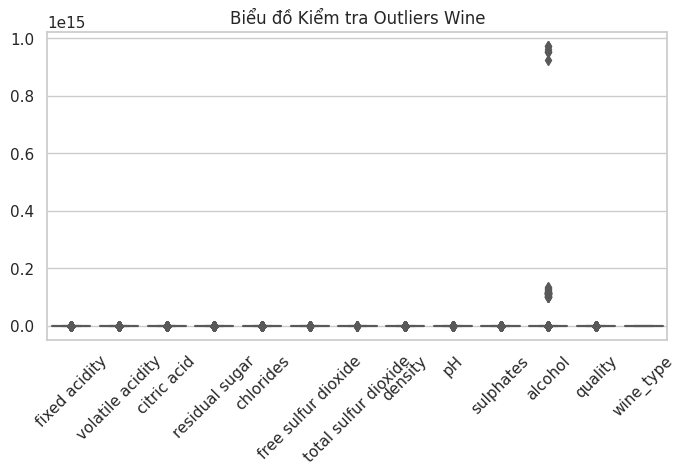

In [ ]:
#kiểm tra nên dùng phân phối nào
# Vẽ boxplot
plt.figure(figsize=(8,4))  # Điều chỉnh kích thước biểu đồ

# Sử dụng seaborn để vẽ biểu đồ boxplot cho từng cột
sns.set(style="whitegrid")
sns.boxplot(data=wine, orient="v", palette="Set2")  # "wine" là tên DataFrame của bạn

plt.title('Biểu đồ Kiểm tra Outliers Wine')
plt.xticks(rotation=45)
plt.show()

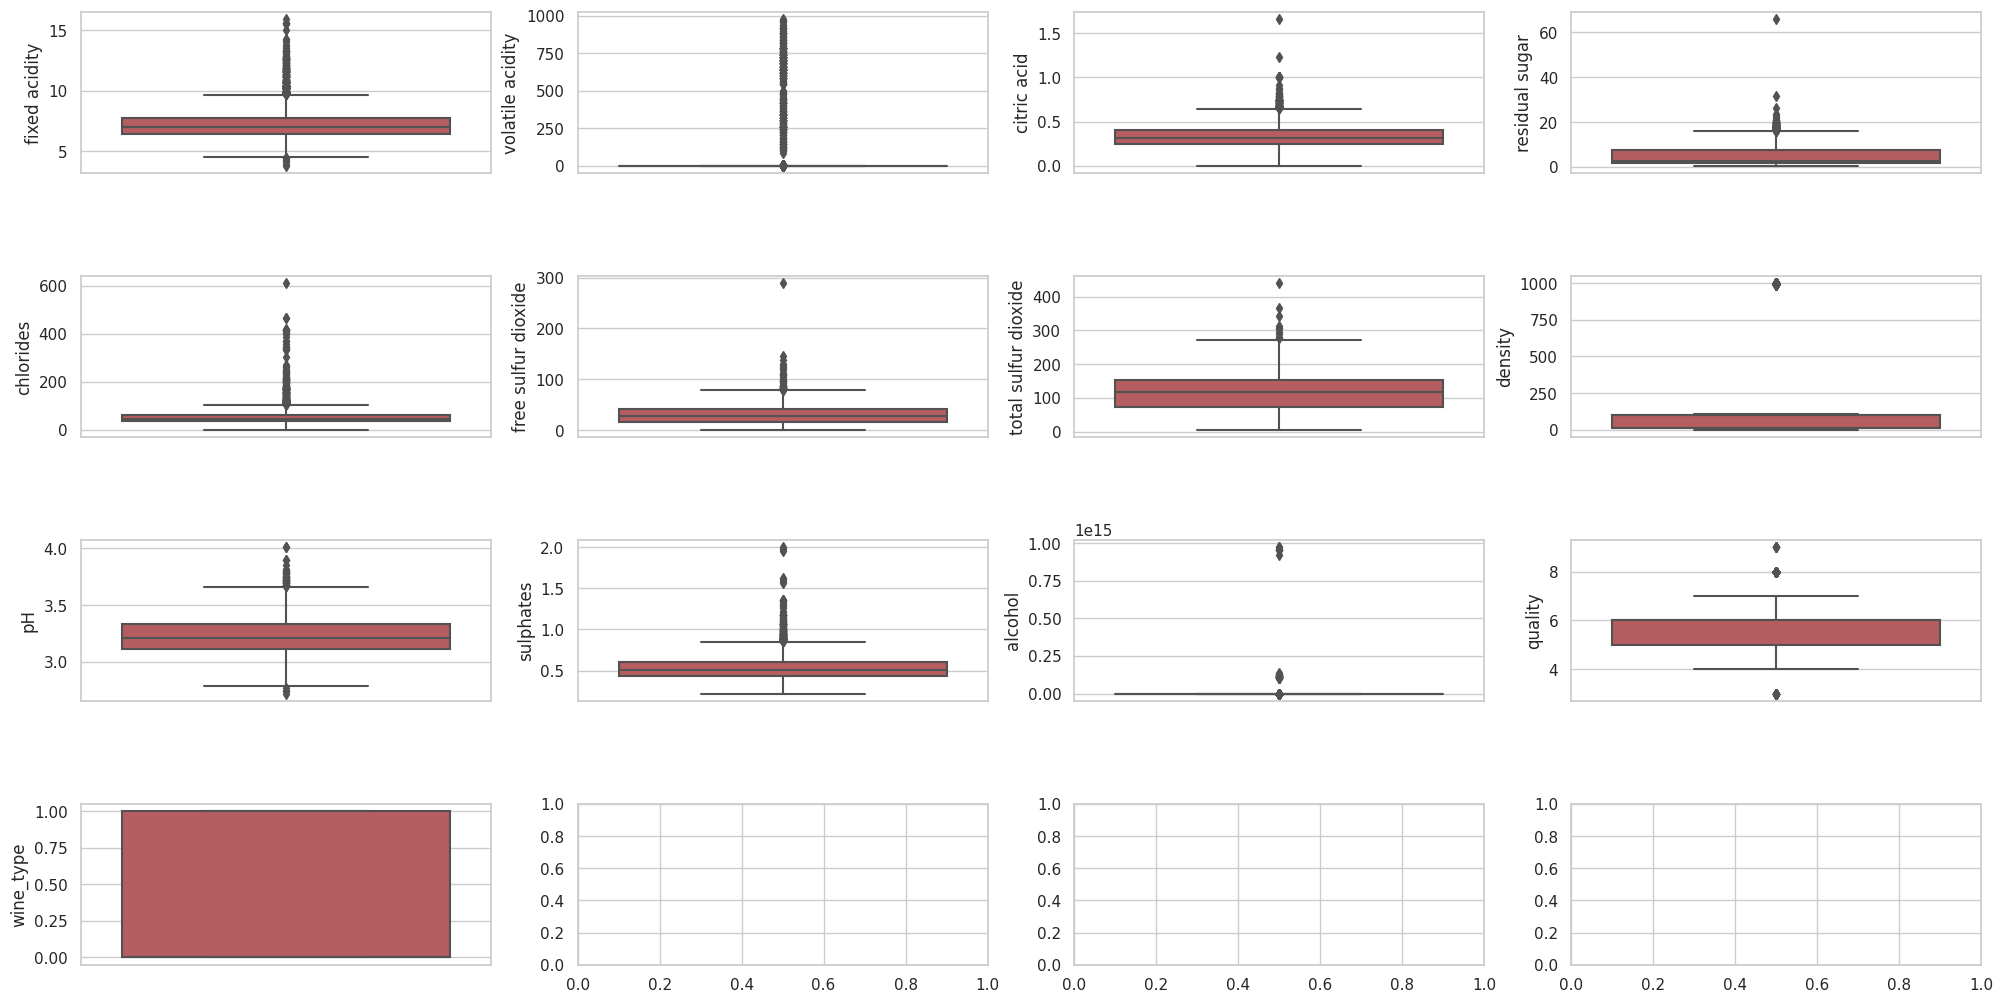

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in wine.items():
  if col != 'type':
    sns.boxplot(y=col, data=wine, color='r', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
# Lưu cột "wine_type", riêng lẻ
wine_type = wine["wine_type"]

# Loại bỏ cột "wine_type" ra khỏi DataFrame trước khi chuẩn hóa
wine = wine.drop("wine_type", axis=1)

scaler = StandardScaler()

# Chuẩn hóa dữ liệu
wine_normalized = scaler.fit_transform(wine)

# Chuyển kết quả thành một DataFrame mới
wine_normalized_df = pd.DataFrame(wine_normalized, columns=wine.columns)

# Kết hợp cột "wine_type" với DataFrame sau khi chuẩn hóa
wine_normalized_df["wine_type"] = wine_type

# Hiển thị 5 hàng đầu của DataFrame sau khi chuẩn hóa
wine_normalized_df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,-0.845123,-0.222272,0.010232,0.611482,0.048009,1.233662,1.213534,-0.061810,1.031007,0.779027,-0.050414,-0.904497,0.0
1,-0.087286,-0.222199,-0.261611,-0.677476,0.824700,0.054110,-0.812223,-0.061653,1.405155,-0.356358,-0.050414,-0.904497,1.0
2,-0.163070,-0.222346,-0.057728,0.300355,-0.495676,0.447294,0.015695,-0.063605,0.968648,0.311515,-0.050414,1.369032,0.0
3,0.443199,-0.219108,-1.892672,-0.610806,1.083598,-0.844596,-1.058837,3.753907,0.220351,0.779027,-0.050414,-0.904497,1.0
4,-0.390421,-0.222493,0.825763,3.044947,0.177457,1.963861,1.935761,-0.060539,-0.715020,-0.022421,-0.050414,-0.904497,0.0
5,-1.072473,3.859332,-0.397533,-0.121890,0.073898,-0.732258,0.209463,-0.443296,0.095635,-0.489933,-0.050414,-0.904497,0.0
6,1.579953,-0.222051,0.485959,-0.788593,-1.296186,0.615802,-1.041222,-0.061832,1.529871,1.313326,-0.050414,0.232268,1.0
7,-0.466204,-0.223008,0.010232,-0.788593,-0.236778,-1.237780,-0.741762,-0.064821,-0.029081,-0.957445,-0.050414,0.232268,0.0
8,-0.693555,-0.223229,0.553919,-0.788593,-0.340337,0.278787,-0.125227,-0.443406,1.467513,-0.222784,-0.050414,0.232268,0.0
9,-0.314637,-0.223082,-0.057728,-0.810817,0.073898,0.222618,-0.001920,-0.443355,1.031007,1.580476,-0.050414,0.232268,0.0


In [ ]:
wine_normalized_df['quality'].unique()

array([-0.90449728,  1.36903238,  0.23226755, -2.0412621 ,  2.5057972 ,
       -3.17802693,  3.64256203])

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '-3.1780269300132162'),
  Text(1, 0, '-2.041262103302377'),
  Text(2, 0, '-0.9044972765915378'),
  Text(3, 0, '0.23226755011930156'),
  Text(4, 0, '1.369032376830141'),
  Text(5, 0, '2.5057972035409803'),
  Text(6, 0, '3.6425620302518196')])

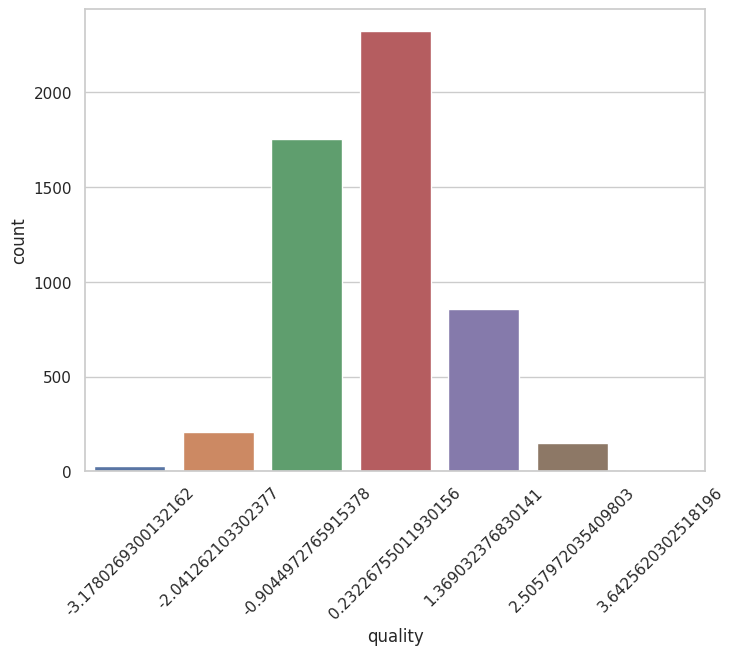

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='quality',data=wine_normalized_df)
plt.xticks(rotation=45)

##download file tiền xử lí

In [ ]:
'''
wine_normalized_df = wine_normalized_df.astype(str)
'''

In [ ]:
wine_normalized_df.to_csv('winedata_pre_processed3.csv', index=False)
#tính thêm duplicated
from google.colab import files

files.download('winedata_pre_processed3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Linear

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
Linearwine = wine_normalized_df.copy()

In [ ]:
X = Linearwine.drop(columns=['quality','wine_type'],axis=1)
y = Linearwine['quality']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

##LN thư viện Sklearn


In [ ]:
regress = linear_model.LinearRegression()
regress.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predict = regress.predict(x_test)
dfLG= pd.DataFrame({'Actual':y_test,'Predictions':y_predict})
dfLG['Predictions']= round(dfLG['Predictions'],2)
dfLG.head(10)

,Actual,Predictions
1878,-0.904497,-0.08
5034,-0.904497,-0.03
3752,0.232268,-0.15
4184,-0.904497,-1.35
555,-0.904497,0.26
5094,-0.904497,0.10
530,0.232268,0.26
4596,-0.904497,-0.21
333,0.232268,0.13
2598,1.369032,0.18


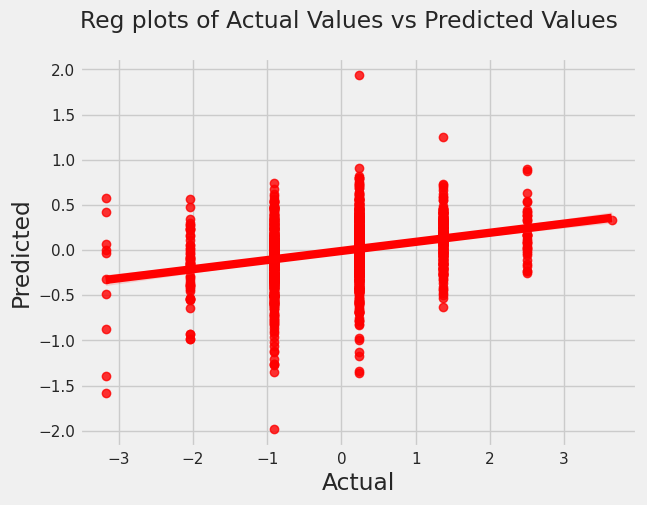

In [ ]:
plt.figsize = (10,6)
sns.regplot(data=dfLG, x=y_test, y=y_predict, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.suptitle('Reg plots of Actual Values vs Predicted Values')
plt.show()

##LN theo thuật toán

In [ ]:
one = np.ones((x_train.shape[0],1))
Xbar = np.concatenate((one,x_train), axis=1)
print(Xbar.shape)
Xbar

(3724, 12)


array([[ 1.        , -0.23885368, -0.22168356, ..., -0.15379707,
        -0.08920888, -0.05041445],
       [ 1.        , -0.46620449, -0.22249301, ..., -1.02681027,
        -1.0242324 , -0.05041445],
       [ 1.        , -0.54198809, -0.22264018, ..., -0.0290809 ,
        -0.15599627, -0.05041445],
       ...,
       [ 1.        , -0.08728647, -0.22109487, ...,  0.09563527,
        -1.09101979, -0.05041445],
       [ 1.        , -0.16307008, -0.22286094, ..., -0.0290809 ,
        -0.55672064, -0.05041445],
       [ 1.        , -0.46620449, -0.22352322, ..., -0.65266176,
        -0.957445  , -0.05041445]])

In [ ]:
A = np.dot(Xbar.T, Xbar) # nhan 2 ma tran
b = np.dot(Xbar.T, y_train)
w = np.dot(np.linalg.pinv(A), b)
w

array([-0.00527141, -0.15439329, -0.07849343,  0.18814978, -0.03527786,
       -0.1932735 ,  0.18003072, -0.28297065, -0.00915724,  0.02923876,
        0.09259933, -0.01629302])

In [ ]:
w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11 = w[0],w[1],w[2],w[3],w[4],w[5],w[6],w[7],w[8],w[9],w[10],w[11]
print(f"y = {round(w0,3)}+{round(w1,3)}*fixed acidity+{round(w2,3)}*volatile acidity+{round(w3,3)}*citric acid+{round(w4,3)}*residual sugar+{round(w5,3)}*chlorides+{round(w6,3)}*free sulfur dioxide+{round(w7,3)}*total sulfur dioxide\
+{round(w8,3)}*density+{round(w9,3)}*pH+{round(w10,3)}*sulphates+{round(w11,3)}*alcohol", end='')

y = -0.005+-0.154*fixed acidity+-0.078*volatile acidity+0.188*citric acid+-0.035*residual sugar+-0.193*chlorides+0.18*free sulfur dioxide+-0.283*total sulfur dioxide+-0.009*density+0.029*pH+0.093*sulphates+-0.016*alcohol

In [ ]:
lp = x_test.copy()
lp['quality_test'] = y_test
lp['quality_pred'] = w0 + w1*x_test['fixed acidity'] + w2*x_test['volatile acidity'] + w3*x_test['citric acid'] + w4*x_test['residual sugar']\
                        + w5*x_test['chlorides'] + w6*x_test['free sulfur dioxide'] + w7*x_test['total sulfur dioxide'] + w8*x_test['density']\
                        + w9*x_test['pH'] + w10*x_test['sulphates'] + w11*x_test['alcohol']
lp.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_test,quality_pred
1878,2.413572,4.006504,1.981098,-0.544135,0.669362,-1.069272,-1.587296,-0.481324,-0.403229,1.046177,-0.050414,-0.904497,-0.082855
5034,0.822117,-0.221536,-0.125689,-0.366348,0.747031,-1.293949,-1.411143,-0.061253,0.843932,0.511878,-0.050414,-0.904497,-0.030098
3752,0.367415,-0.220065,-1.620828,-0.699699,0.669362,-0.844596,-1.534450,-0.443194,0.594500,0.044366,-0.050414,0.232268,-0.145847
4184,-0.087286,-0.222051,-0.805298,-0.766370,5.717858,-0.339074,0.456077,-0.063090,-0.715020,0.645452,-0.050414,-0.904497,-1.353795
555,-0.238854,-0.222935,0.553919,2.300462,0.048009,2.862567,1.477763,-0.443113,-0.153797,1.046177,-0.050414,-0.904497,0.257334
5094,0.291632,-0.223008,0.553919,0.033673,0.410465,-0.900765,-0.407072,-0.062529,-0.340871,1.780838,-0.050414,-0.904497,0.100263
530,-0.617772,-0.222640,-0.261611,-0.455242,-1.297221,-0.619919,-0.283765,-0.063686,0.157993,-0.423146,-0.050414,0.232268,0.260674
4596,1.579953,-0.221757,1.165567,-0.566359,0.902370,0.447294,0.491307,-0.443147,-0.029081,0.111153,-0.050414,-0.904497,-0.211099
333,-0.163070,-0.223523,-0.125689,-0.544135,-0.184999,0.222618,-0.424687,-0.064404,-2.149256,-0.423146,-0.050414,0.232268,0.128392
2598,-0.541988,-0.221978,0.078193,-0.255231,-0.599234,0.559633,0.279924,-0.443453,0.345068,-0.957445,-0.050414,1.369032,0.183217


In [ ]:
r_square = regress.score(x_test,y_test)
mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse)
print(f"R_squared: {r_square}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R_squared: 0.08521064391935385
Mean Absolute Error: 0.7406944873814744
Mean Squared Error: 0.8949042900487116
Root Mean Squared Error: 0.9459938107877406


#KNN

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from sklearn import neighbors
from collections import Counter

In [ ]:
KNNwine = wine_normalized_df.copy()

In [ ]:
KNNwine = KNNwine.drop('wine_type', axis=1)

In [ ]:
KNNwine['quality'] = KNNwine['quality'].apply(lambda x: 1 if x > 0 else -1)

In [ ]:
null_values = KNNwine.isnull().sum()
null_values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
KNNwine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.845123,-0.222272,0.010232,0.611482,0.048009,1.233662,1.213534,-0.061810,1.031007,0.779027,-0.050414,-1
1,-0.087286,-0.222199,-0.261611,-0.677476,0.824700,0.054110,-0.812223,-0.061653,1.405155,-0.356358,-0.050414,-1


In [ ]:
X = KNNwine.iloc[:,:-1].values
y = KNNwine.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

##Error Rates

Minimum error:- 0.2869674185463659 at K = 18


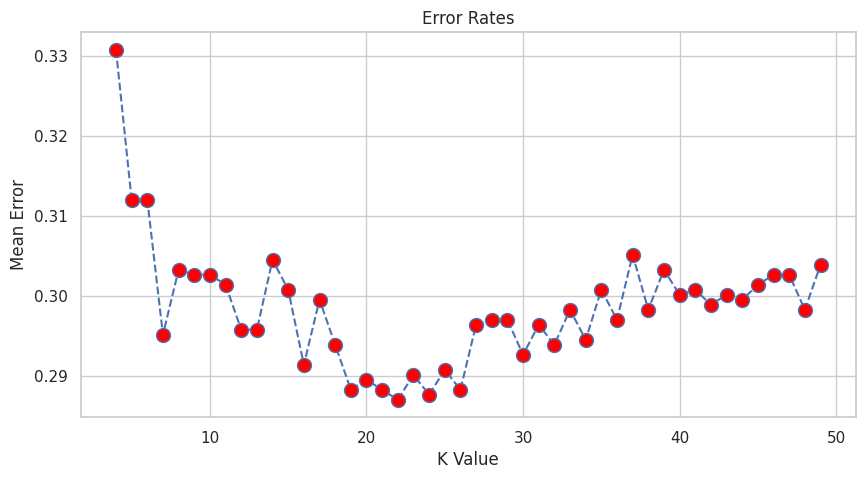

In [ ]:
error = []

for i in range(4,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,5))
plt.plot(range(4,50), error, linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rates')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

print("Minimum error:-",min(error),"at K =",error.index(min(error)))

##KNN theo thuật toán

In [ ]:
def distance_eclid(x_train, x_test_point):
    distances = []

    for train_row in range(len(x_train)):
        train_point = x_train[train_row]
        current_distance = 0

        for col in range(len(train_point)):
            current_distance += (train_point[col] - x_test_point[col]) ** 2

        current_distance = np.sqrt(current_distance)
        distances.append(current_distance)

    distances = pd.DataFrame(data=distances, columns=['dist'])
    return distances


In [ ]:
def nearest_neighbors(distance_point, K):
    df_nearest = distance_point.sort_values(by=['dist'], axis=0)
    df_nearest = df_nearest[:K]
    return df_nearest

def compare(df_nearest, y_train):
    counter_vote= Counter(y_train[df_nearest.index])
    y_pred= counter_vote.most_common()[0][0]
    return y_pred

In [ ]:
def KNNscratch(x_train, y_train, x_test, K):
    y_pred = []

    for x_test_point in x_test:
        distance_point = distance_eclid(x_train, x_test_point)
        nearest_neighbors_df = nearest_neighbors(distance_point, K)
        y_pred_point = compare(nearest_neighbors_df, y_train)
        y_pred.append(y_pred_point)

    return y_pred

In [ ]:
K = 21

In [ ]:
y_pred = KNNscratch(X_train, y_train, X_test, K)
print ("dự đoán: ", y_pred[0:10])
print ("nhãn test : ", y_test[0:10].tolist())

dự đoán:  [1, 1, 1, 1, 1, 1, 1, -1, 1, 1]
nhãn test :  [1, 1, 1, -1, 1, 1, 1, -1, -1, 1]


              precision    recall  f1-score   support

          -1       0.66      0.43      0.52       578
           1       0.73      0.87      0.79      1018

    accuracy                           0.71      1596
   macro avg       0.69      0.65      0.66      1596
weighted avg       0.70      0.71      0.69      1596



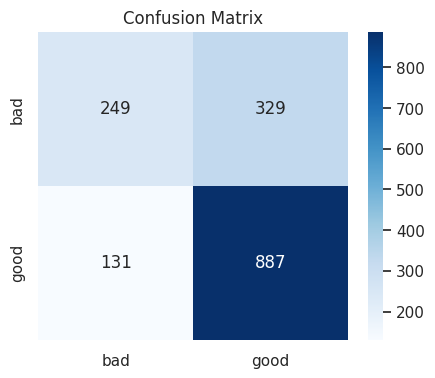

In [ ]:
# Sử dụng confusion matrix đã tính trước đó
cm = confusion_matrix(y_test, y_pred)

# Tạo biểu đồ heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])

# Đặt tên trục và tiêu đề
plt.title('Confusion Matrix')
print(classification_report(y_test, y_pred))
plt.show()

##KNN theo thư viện

In [ ]:
KNNwinesk = wine_normalized_df.copy()

In [ ]:
KNNwinesk = KNNwinesk.drop('wine_type', axis=1)

In [ ]:
KNNwinesk['quality'] = KNNwinesk['quality'].apply(lambda x: 1 if x > 0 else -1)

In [ ]:
X = KNNwinesk.iloc[:,:-1].values
y = KNNwinesk.iloc[:,-1].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size= 0.3, random_state=0)

In [ ]:
knn_sk = neighbors.KNeighborsClassifier(n_neighbors = 21, p=2)
knn_sk.fit(X_train1, y_train1)
y_pred1 = knn_sk.predict(X_test1)
print ("Print results for first 20 test data points:")
print ("Predicted labels: ", y_pred[0:10].tolist())
print ("Ground truth : ", y_test[0:10].tolist())

Print results for first 20 test data points:
Predicted labels:  [1, 1, 1, 1, 1, 1, 1, -1, 1, 1]
Ground truth :  [1, 1, 1, -1, 1, 1, 1, -1, -1, 1]


In [ ]:
print ("Accuracy %.2f %%" %(100*accuracy_score(y_test1, y_pred1)))

Accuracy 71.18 %


              precision    recall  f1-score   support

          -1       0.66      0.43      0.52       578
           1       0.73      0.87      0.79      1018

    accuracy                           0.71      1596
   macro avg       0.69      0.65      0.66      1596
weighted avg       0.70      0.71      0.69      1596



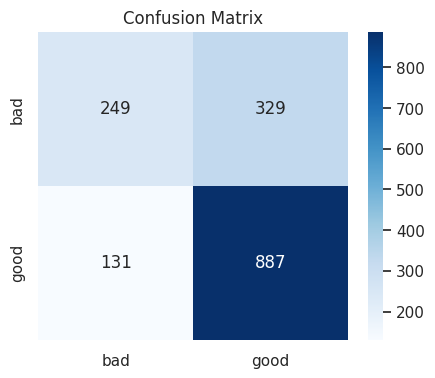

In [ ]:
# Sử dụng confusion matrix đã tính trước đó
cm = confusion_matrix(y_test1, y_pred1)

# Tạo biểu đồ heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])

# Đặt tên trục và tiêu đề
plt.title('Confusion Matrix')
print(classification_report(y_test, y_pred))
plt.show()

#Naive Bayes Classifier

In [ ]:
NBCwine = wine_normalized_df.copy()

In [ ]:
NBCwine.drop('wine_type', axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.845123,-0.222272,0.010232,0.611482,0.048009,1.233662,1.213534,-0.061810,1.031007,0.779027,-0.050414,-0.904497
1,-0.087286,-0.222199,-0.261611,-0.677476,0.824700,0.054110,-0.812223,-0.061653,1.405155,-0.356358,-0.050414,-0.904497
2,-0.163070,-0.222346,-0.057728,0.300355,-0.495676,0.447294,0.015695,-0.063605,0.968648,0.311515,-0.050414,1.369032
3,0.443199,-0.219108,-1.892672,-0.610806,1.083598,-0.844596,-1.058837,3.753907,0.220351,0.779027,-0.050414,-0.904497
4,-0.390421,-0.222493,0.825763,3.044947,0.177457,1.963861,1.935761,-0.060539,-0.715020,-0.022421,-0.050414,-0.904497
...,...,...,...,...,...,...,...,...,...,...,...,...
5315,-0.390421,-0.222640,-1.213063,-0.810817,-0.184999,1.907692,0.790767,3.732645,-0.340871,-0.957445,-0.050414,-0.904497
5316,0.594766,-0.220653,-1.009181,0.700376,-1.297221,-0.956934,-0.953146,-0.443240,-0.839736,-1.558532,-0.050414,-2.041262
5317,-0.617772,-0.222861,0.350037,-0.121890,-0.288558,0.615802,0.579384,-0.443389,-0.278513,-0.890658,-0.050414,1.369032
5318,-0.163070,-0.223670,0.553919,-0.744146,-0.392117,-0.788427,-0.512764,-0.443432,-0.216155,-0.757083,-0.050414,0.232268


In [ ]:
# Tạo cột nhãn "label" dựa trên điều kiện
NBCwine['label'] = np.where(NBCwine['quality'] >= 0, 'good quality', 'bad quality')

In [ ]:
# Tách dữ liệu thành X và y
X = NBCwine.drop(['quality','label'], axis=1)
y = NBCwine['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

##NBC thuật toán

In [ ]:
# Tính xác suất tiên nghiệm
p_good_quality = len(y_train[y_train == 'good quality']) / len(y_train)
p_bad_quality = 1 - p_good_quality

In [ ]:
# Tính giá trị kỳ vọng và phương sai cho các biến độc lập
mean_good_quality = X_train[y_train == 'good quality'].mean()
mean_bad_quality = X_train[y_train == 'bad quality'].mean()
std_good_quality = X_train[y_train == 'good quality'].std()
std_bad_quality = X_train[y_train == 'bad quality'].std()

In [ ]:
# Hàm tính xác suất theo phân phối Gaussian
def gaussian_probability(x, mean, std):
    return (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-(x - mean) ** 2 / (2 * std ** 2))

In [ ]:
# Dự đoán nhãn trên tập kiểm tra
y_pred = []

for i in range(len(X_test)):
    p_good = p_good_quality
    p_bad = p_bad_quality

    for feature, value in X_test.iloc[i].items():  # Sử dụng items() để duyệt qua các cặp (feature, value)
        p_good *= gaussian_probability(value, mean_good_quality[feature], std_good_quality[feature])
        p_bad *= gaussian_probability(value, mean_bad_quality[feature], std_bad_quality[feature])

    if p_good > p_bad:
        y_pred.append('good quality')
    else:
        y_pred.append('bad quality')


In [ ]:
# Đánh giá độ chính xác
correct = sum(1 for actual, pred in zip(y_test, y_pred) if actual == pred)
accuracy = correct / len(y_test)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.60


              precision    recall  f1-score   support

 bad quality       0.41      0.25      0.31       578
good quality       0.65      0.80      0.72      1018

    accuracy                           0.60      1596
   macro avg       0.53      0.52      0.51      1596
weighted avg       0.56      0.60      0.57      1596



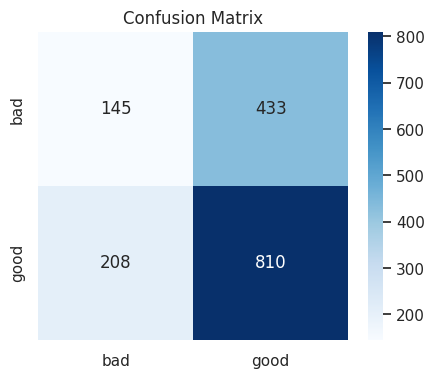

In [ ]:
# Sử dụng confusion matrix đã tính trước đó
cm = confusion_matrix(y_test, y_pred)

# Tạo biểu đồ heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=['bad', 'good'], yticklabels=['bad', 'good'])

# Đặt tên trục và tiêu đề
plt.title('Confusion Matrix')
print(classification_report(y_test, y_pred))
plt.show()

##NBC thư viện

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NBCwinesk = wine_normalized_df.copy()

In [ ]:
NBCwinesk = NBCwinesk.drop(['wine_type'], axis=1)

In [ ]:
null = NBCwinesk.isnull().sum()
null

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Tạo cột nhãn "label" dựa trên điều kiện
NBCwinesk['label'] = np.where(NBCwinesk['quality'] >= 0, 'good quality', 'bad quality')

In [ ]:
# Tách dữ liệu thành X và y
X = NBCwinesk.drop(['quality','label'], axis=1)
y = NBCwinesk['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

In [ ]:
# Tạo mô hình Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.65


#K-means

In [ ]:
wine_normalized_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,label
0,-0.845123,-0.222272,0.010232,0.611482,0.048009,1.233662,1.213534,-0.061810,1.031007,0.779027,-0.050414,-0.904497,0.0,bad quality
1,-0.087286,-0.222199,-0.261611,-0.677476,0.824700,0.054110,-0.812223,-0.061653,1.405155,-0.356358,-0.050414,-0.904497,1.0,bad quality
2,-0.163070,-0.222346,-0.057728,0.300355,-0.495676,0.447294,0.015695,-0.063605,0.968648,0.311515,-0.050414,1.369032,0.0,good quality
3,0.443199,-0.219108,-1.892672,-0.610806,1.083598,-0.844596,-1.058837,3.753907,0.220351,0.779027,-0.050414,-0.904497,1.0,bad quality
4,-0.390421,-0.222493,0.825763,3.044947,0.177457,1.963861,1.935761,-0.060539,-0.715020,-0.022421,-0.050414,-0.904497,0.0,bad quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,-0.390421,-0.222640,-1.213063,-0.810817,-0.184999,1.907692,0.790767,3.732645,-0.340871,-0.957445,-0.050414,-0.904497,NaN,bad quality
5316,0.594766,-0.220653,-1.009181,0.700376,-1.297221,-0.956934,-0.953146,-0.443240,-0.839736,-1.558532,-0.050414,-2.041262,0.0,bad quality
5317,-0.617772,-0.222861,0.350037,-0.121890,-0.288558,0.615802,0.579384,-0.443389,-0.278513,-0.890658,-0.050414,1.369032,0.0,good quality
5318,-0.163070,-0.223670,0.553919,-0.744146,-0.392117,-0.788427,-0.512764,-0.443432,-0.216155,-0.757083,-0.050414,0.232268,1.0,good quality


In [ ]:
KmeanWine = wine_normalized_df.copy()

In [ ]:
null = KmeanWine.isnull().sum()
null

In [ ]:
KmeanWine = KmeanWine.dropna()  # Xóa các dòng có giá trị không hợp lệ
KmeanWine = KmeanWine.apply(pd.to_numeric, errors='coerce')  # Chuyển đổi thành số, lỗi chuyển đổi sẽ trở thành NaN
KmeanWine.fillna(0, inplace=True)  # Thay thế NaN bằng 0 hoặc giá trị khá

In [ ]:
KmeanWine.shape

(4489, 13)

##Elbows

In [ ]:
from sklearn.cluster import KMeans

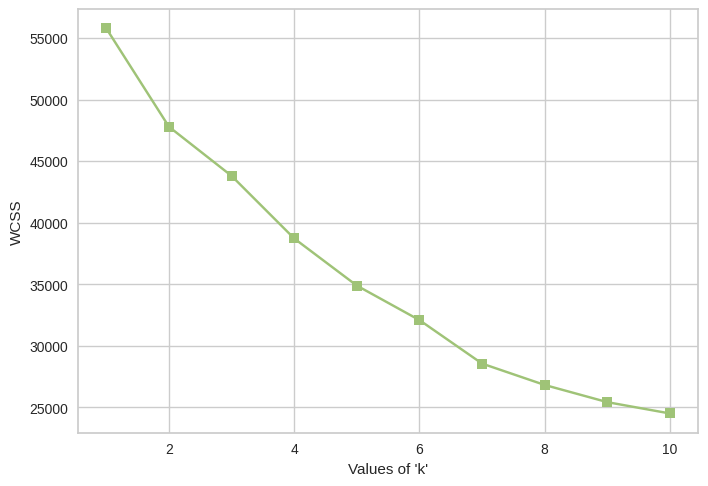

In [ ]:
wcss = {}
for i in range(1, 11):
	kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init=10)
	kmeans.fit(KmeanWine)
	wcss[i] = kmeans.inertia_

plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

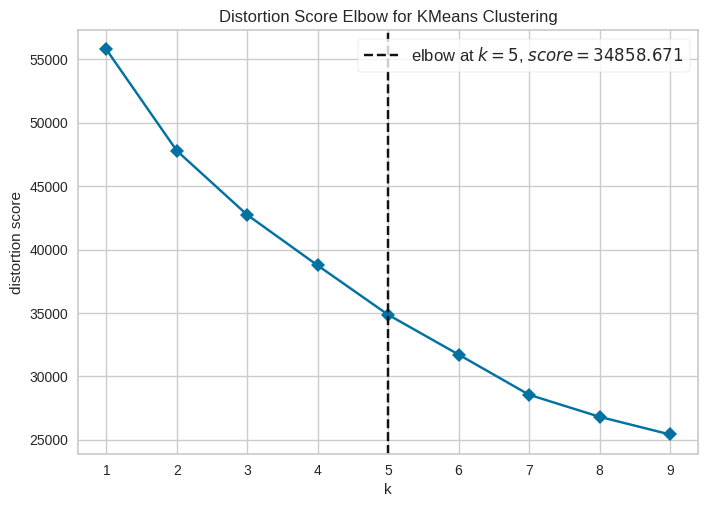

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(KmeanWine)
visualizer.show()

##Giảm chiều

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)
reduced_KmeanWine=pd.DataFrame(data=pca.fit_transform(KmeanWine),columns=['PCA1','PCA2'])
#Reduced Features
reduced_KmeanWine.head()

,PCA1,PCA2
0,1.241350,-0.618087
1,-1.070520,-0.797062
2,0.329386,-0.589021
3,-2.192591,-0.526054
4,3.465635,1.164009


<function matplotlib.pyplot.show(close=None, block=None)>

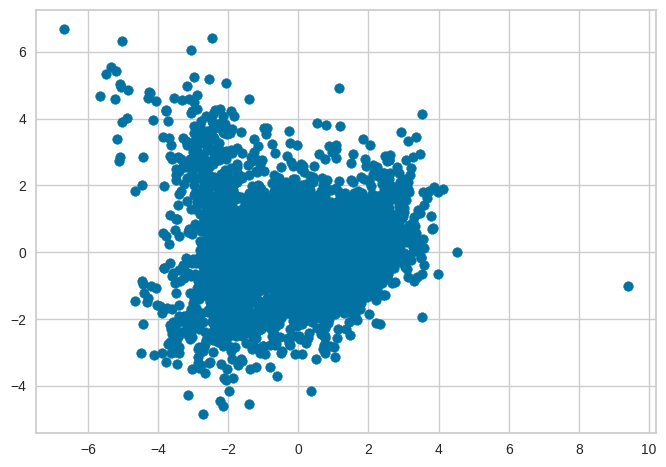

In [ ]:
# trực quan các điểm dữ liệu
reduced_KmeanWine = reduced_KmeanWine.rename(columns={'PCA1': 'x', 'PCA2': 'y'})
plt.scatter(reduced_KmeanWine['x'],reduced_KmeanWine['y'])
plt.show

##K-means Thuật toán


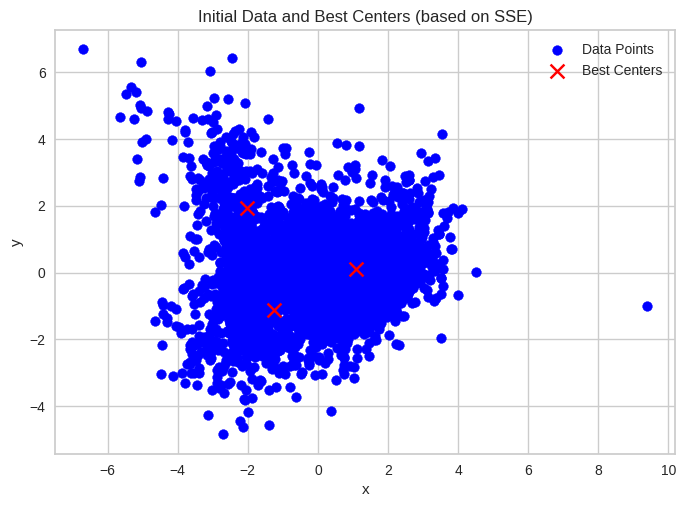

In [ ]:
# Khởi tạo dữ liệu giảm chiều
reduced_KmeanWine = reduced_KmeanWine.rename(columns={'PCA1': 'x', 'PCA2': 'y'})
data = reduced_KmeanWine.values

# Số lượng cụm
n_clusters = 3

# Khởi tạo mảng lưu các tâm cụm cuối cùng và SSE tương ứng
final_centers = []
final_sse = []

# Chạy vòng lặp n_init
n_init = 10
for _ in range(n_init):
    # Khởi tạo các tâm cụm ban đầu ngẫu nhiên từ dữ liệu
    np.random.seed()  # Để có sự ngẫu nhiên
    initial_centers = data[np.random.choice(data.shape[0], n_clusters, replace=False)]

    # Tạo mô hình K-Means
    kmeans = KMeans(n_clusters=n_clusters, init=initial_centers)
    kmeans.fit(data)
    final_centers.append(kmeans.cluster_centers_)
    final_sse.append(kmeans.inertia_)  # Lưu SSE

# Chọn tâm cụm có SSE thấp nhất
best_sse_index = np.argmin(final_sse)
best_centers = final_centers[best_sse_index]

# Trực quan hóa dữ liệu và tâm cụm cuối cùng
plt.scatter(data[:, 0], data[:, 1], c='blue', marker='o', label='Data Points')
plt.scatter(best_centers[:, 0], best_centers[:, 1], c='red', marker='x', s=100, label='Best Centers')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial Data and Best Centers (based on SSE)')
plt.show()

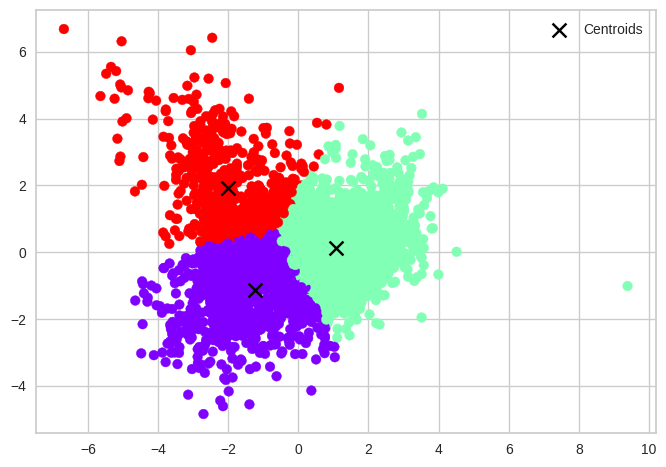

In [ ]:
# Biến đổi dữ liệu thành mảng NumPy
data = data.astype(float)

# Tính khoảng cách giữa điểm dữ liệu và tất cả các tâm cụm
def compute_distances(data, centers):
    return np.linalg.norm(data[:, np.newaxis] - centers, axis=2)

# Số lần lặp để cập nhật tâm cụm
max_iters = 100

# Hệ số học (learning rate) cho việc cập nhật tâm cụm
learning_rate = 0.01

# Biến lưu trữ các tâm cụm
centers = best_centers  # Sử dụng tâm cụm tốt nhất từ đoạn code 1

# Tiến hành cập nhật các tâm cụm
for i in range(max_iters):
    # Tính khoảng cách của từng điểm đến các tâm cụm
    distances = compute_distances(data, centers)

    # Lấy chỉ số của cụm gần nhất cho mỗi điểm
    cluster_assignment = np.argmin(distances, axis=1)

    # Cập nhật các tâm cụm dựa trên điểm thuộc cụm
    for j in range(n_clusters):
        mask = (cluster_assignment == j)
        if np.sum(mask) > 0:
            centers[j] += learning_rate * np.mean(data[mask] - centers[j], axis=0)

# Trực quan hóa dữ liệu và các tâm cụm
plt.scatter(data[:, 0], data[:, 1], c=cluster_assignment, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.legend()
plt.show()

##K-means thư viện

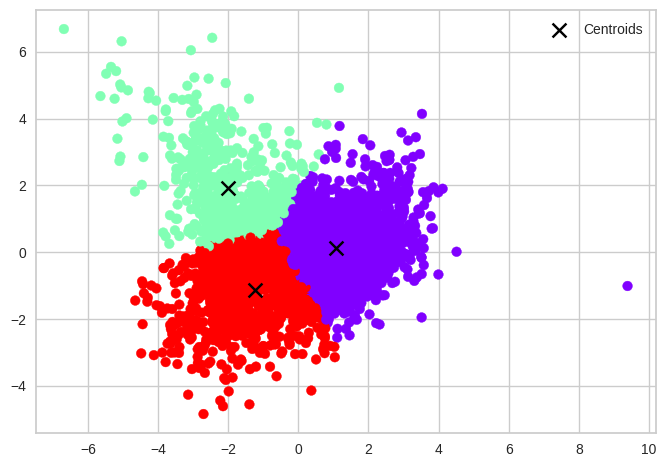

In [ ]:
# Khởi tạo mô hình K-Means với số cụm (clusters) cần tạo
n_clusters = 3  # Đặt số cụm cần tạo
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit dữ liệu và dự đoán các cụm
kmeans.fit(reduced_KmeanWine)
cluster_labels = kmeans.predict(reduced_KmeanWine)

# Lấy các tâm cụm
cluster_centers = kmeans.cluster_centers_
# Đổi tên cột của reduced_X để phù hợp với tên x và y
reduced_KmeanWine = reduced_KmeanWine.rename(columns={'PCA1': 'x', 'PCA2': 'y'})

# Trực quan hóa dữ liệu và các tâm cụm
plt.scatter(reduced_KmeanWine['x'], reduced_KmeanWine['y'], c=cluster_labels, cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.legend()
plt.show()